In [66]:
raw = """.#.#.#
...##.
#....#
..#...
#.#..#
####.."""
raw = open('data/18.txt').read()

def parse(raw):
    return [[True if l == '#' else False for l in line] for line in raw.splitlines()]

def pad(grid):
    res = []
    size = len(grid)+2
    for l in grid:
        res.append([False] + l + [False])
    return [[False]*size] + res + [[False]*size]

grid = parse(raw)
grid = pad(grid)
size = len(grid)


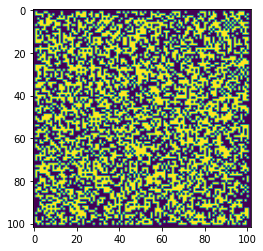

In [67]:
from matplotlib.pyplot import imshow
imshow(grid)

In [57]:
def on_neighbors(r,c, grid):
    res = 0
    for i in range(r-1, r+2):
        for j in range(c-1, c+2):
            try:
                res += grid[i][j]
            except IndexError:
                print('Err', i, j)
    return res - grid[r][c]
on_neighbors(1,2,grid)


0

In [58]:
from itertools import product
from copy import deepcopy
def step(grid):
    new_grid = deepcopy(grid)
    for r,c in product(range(1, size - 1), range(1, size - 1)):
        #print(r,c)
        n = on_neighbors(r,c, grid)
        if grid[r][c]:
            new_grid[r][c] = True if 2 <= n <=3 else False
        else:
            new_grid[r][c] = True if n == 3 else False
    return new_grid


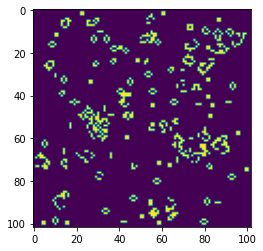

In [52]:
for i in range(100):
    grid = step(grid)
imshow(grid)

In [53]:
sum(sum(l) for l in grid)

814

# part 2

In [68]:
def adjust(grid):
    grid[1][1] = True
    grid[1][-2] = True
    grid[-2][1] = True
    grid[-2][-2] = True

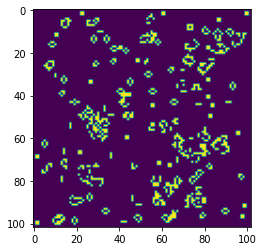

In [69]:
grid = parse(raw)
grid = pad(grid)
size = len(grid)

for i in range(100):
    adjust(grid)
    grid = step(grid)
imshow(grid)

In [70]:
adjust(grid)
sum(sum(l) for l in grid)

924